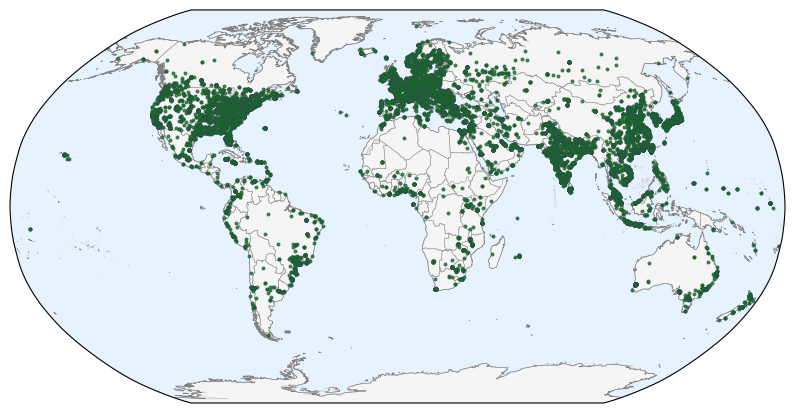

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. 读取数据
company_df = pd.read_excel('company_data_with_grid.xlsx')
shapefile = 'world boundry/Global_country.shp'
world = gpd.read_file(shapefile)

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 2. 创建图形和投影
plt.figure(figsize=(10, 6))  # 增大图形尺寸
ax = plt.axes(projection=ccrs.Robinson())


# 3. 绘制世界地图
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#F5F5F5')  # 更浅的陆地颜色
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#E6F3FF')  # 更柔和的海洋蓝
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.3, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, edgecolor='gray')

# 4. 绘制国家边界
world.plot(ax=ax, transform=ccrs.PlateCarree(),
           facecolor='none', edgecolor='silver', linewidth=0.3)

# 5. 绘制公司位置（重点修改部分）
scatter = ax.scatter(
    company_df['Longitude'], 
    company_df['Latitude'],
    # ===== 点的大小调整 =====
    s=5,  # 基础大小（可改为company_df['Size']如果数据中有规模列）
    
    # ===== 点的内部颜色 =====
    color='green',  
    #0290b4
    
    # ===== 点的边缘样式 =====
    edgecolors='darkslategray',  # 边缘颜色
    linewidths=0.6,         # 边缘线宽
    
    # ===== 其他视觉效果 =====
    alpha=0.8,           # 透明度（0-1）
    marker='o',          # 标记形状（o圆形，s方形，^三角形等）
    zorder=10,           # 绘制层级（确保点在最上层）
    transform=ccrs.PlateCarree(),
    label='firms location'
)

# 6. 添加图例和标题
#plt.legend(loc='best', framealpha=False, fontsize=10, markerscale=1)
#plt.title('Global Distribution of Company Headquarters', 
 #        fontsize=18, pad=20, fontweight='bold')

# 7. 保存和显示
plt.savefig('global_companies_map_enhanced.png', dpi=500, bbox_inches='tight', transparent=False)
plt.show()

In [ ]:
from PIL import Image

# 两张图片路径
top_image_path = "global_companies_map_enhanced.png"
bottom_image_path = "climate_shocks_flow.png"

# 打开两张图片
top_img = Image.open(top_image_path)
bottom_img = Image.open(bottom_image_path)

# 计算目标宽度（取最大宽度）
target_width = max(top_img.width, bottom_img.width)

# 调整图片宽度（保持宽高比）
def resize_to_width(img, target_width):
    width_percent = target_width / float(img.width)
    target_height = int(float(img.height) * float(width_percent))
    return img.resize((target_width, target_height), Image.Resampling.LANCZOS)

# 调整两张图片宽度
top_img_resized = resize_to_width(top_img, target_width)
bottom_img_resized = resize_to_width(bottom_img, target_width)

# 计算合并后的尺寸
total_height = top_img_resized.height + bottom_img_resized.height

# 创建新画布（白色背景）
merged_img = Image.new('RGB', (target_width, total_height), (255, 255, 255))

# 将图片粘贴到新画布上（现在宽度相同，直接左对齐即可）
merged_img.paste(top_img_resized, (0, 0))
merged_img.paste(bottom_img_resized, (0, top_img_resized.height))

# 保存合并后的图片
merged_img.save("merged_vertical_stats.png", dpi=(500, 500), quality=100)
display(merged_img)
print("图片已等宽上下合并保存为 merged_vertical_resized.png")

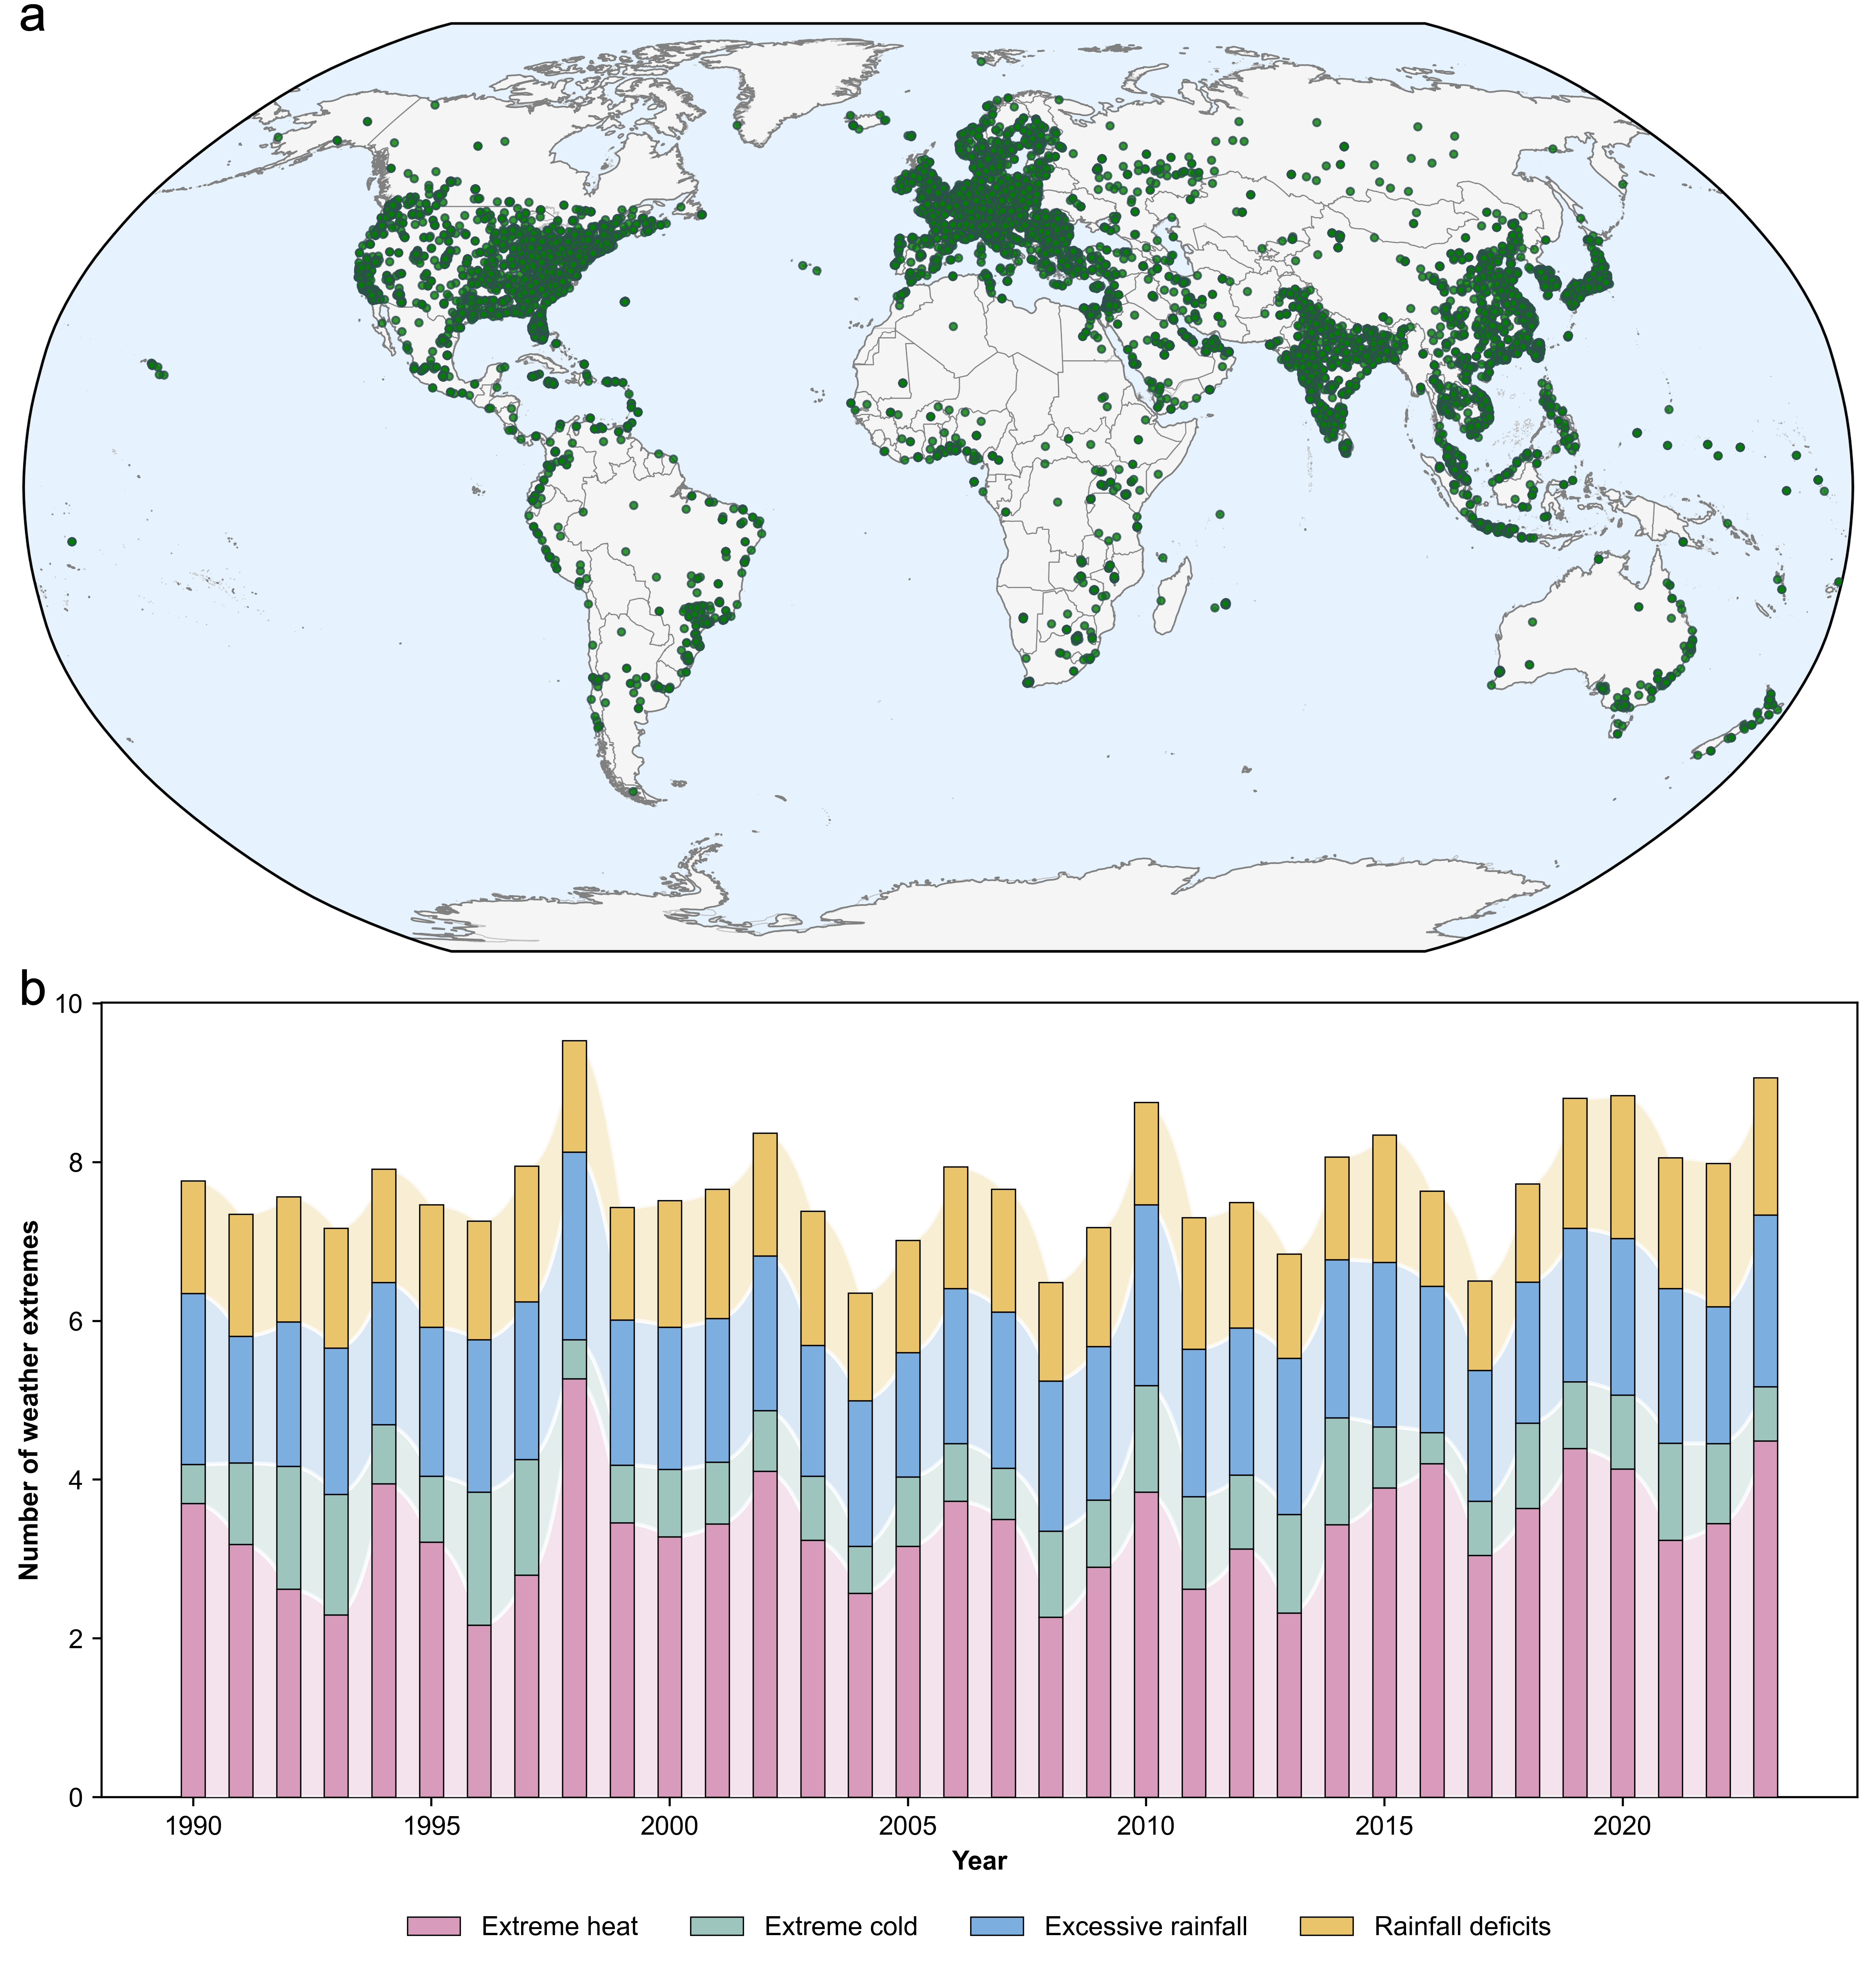

图片已添加文字并保存为 merged_vertical_stats_with_text.png


In [1]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# 两张图片路径
top_image_path = "global_companies_map_enhanced.png"
bottom_image_path = "climate_shocks_flow.png"

# 打开两张图片
top_img = Image.open(top_image_path)
bottom_img = Image.open(bottom_image_path)

# 计算目标宽度（取最大宽度）
target_width = max(top_img.width, bottom_img.width)

# 调整图片宽度（保持宽高比）
def resize_to_width(img, target_width):
    width_percent = target_width / float(img.width)
    target_height = int(float(img.height) * float(width_percent))
    return img.resize((target_width, target_height), Image.Resampling.LANCZOS)

# 调整两张图片宽度
top_img_resized = resize_to_width(top_img, target_width)
bottom_img_resized = resize_to_width(bottom_img, target_width)

# 计算合并后的尺寸
total_height = top_img_resized.height + bottom_img_resized.height

# 创建新画布（白色背景）
merged_img = Image.new('RGB', (target_width, total_height), (255, 255, 255))

# 将图片粘贴到新画布上
merged_img.paste(top_img_resized, (0, 0))
merged_img.paste(bottom_img_resized, (0, top_img_resized.height))

# ===== 新增：添加文字 =====
draw = ImageDraw.Draw(merged_img)

# 文字参数配置（可自定义）
text_settings = {
    "top_text": {
        "text": "a",  # 文字内容
        "position": (50, -38),  # (x,y) 坐标
        "font": ImageFont.truetype("arial.ttf", 130),  # 字体和大小
        "color": (0, 0, 0),  # 黑色
        "bold": True  # 加粗
    },
    "bottom_text": {
        "text": "b",
        "position": (50, top_img_resized.height - 40),
        "font": ImageFont.truetype("arial.ttf", 130),
        "color": (0, 0, 0),
        "bold": True
    }
}

# 添加文字函数
def add_text(draw, text_params):
    font = text_params["font"]
    if text_params["bold"]:
        # 模拟加粗：多次绘制偏移文字
        x, y = text_params["position"]
        for offset in [(0,0), (1,0), (0,1)]:
            draw.text((x+offset[0], y+offset[1]), 
                     text_params["text"], 
                     fill=text_params["color"], 
                     font=font)
    else:
        draw.text(text_params["position"], 
                 text_params["text"], 
                 fill=text_params["color"], 
                 font=font)

# 添加顶部和底部文字
add_text(draw, text_settings["top_text"])
add_text(draw, text_settings["bottom_text"])

# 保存合并后的图片
merged_img.save("merged_vertical_stats_with_text.png", dpi=(500, 500), quality=100)

# 显示结果
display(merged_img)
print("图片已添加文字并保存为 merged_vertical_stats_with_text.png")